# Прогнозирование статуса курильщика по биосигналам
Представляем вашему вниманию проект-исследование, который помогает нам понять, является человек курильщиком или нет, анализируя у него набор определённых биосигналов, таких как рост, вес, зрение, слух, уровень гемоглобина, наличие кариеса, кровяное давление и т. д. \\
Почему это исследование важно? Согласно отчету Всемирной организации здравоохранения, к 2030 году число смертей, вызванных курением, достигнет 10 миллионов. Долгое время использовалось основанное на фактических данных лечение для помощи в прекращении курения, но, к сожалению, лишь менее трети участников смогли достичь цели воздержания. Многие врачи сочли консультирование по отказу от курения неэффективным и отнимающим много времени. \\
 Чтобы решить эту проблему, было предложено несколько факторов для выявления курильщиков, у которых было больше шансов отказаться от курения, включая уровень никотиновой зависимости, концентрацию угарного газа (CO) в выдыхаемом воздухе, количество выкуриваемых сигарет в день, возраст начала курения, предыдущие попытки отказа от курения, семейное положение, стрессоустойчивость, темперамент и импульсивность, а также наличие мотивации бросить курить. Однако индивидуальное использование этих факторов для прогнозирования может привести к противоречивым результатам, которые не будут достаточно простыми для интерпретации и применения врачами. Предоставление модели прогнозирования может быть хорошим способом понять возможность вероятности отказа от курения для каждого отдельного курильщика. \\
Проект выполнен совместно  Караваевой Александрой, Микляевой Дарьей, Морозовой Марией и Тарасюк Екатериной.

Для начала мы знакомимся с базой данных

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
train_data = pd.read_csv('/content/sample_data/train_dataset.csv')
train_data

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,35,170,85,97.0,0.9,0.9,1,1,118,78,...,70,142,19.8,1,1.0,61,115,125,1,1
1,20,175,110,110.0,0.7,0.9,1,1,119,79,...,71,114,15.9,1,1.1,19,25,30,1,0
2,45,155,65,86.0,0.9,0.9,1,1,110,80,...,57,112,13.7,3,0.6,1090,1400,276,0,0
3,45,165,80,94.0,0.8,0.7,1,1,158,88,...,46,91,16.9,1,0.9,32,36,36,0,0
4,20,165,60,81.0,1.5,0.1,1,1,109,64,...,47,92,14.9,1,1.2,26,28,15,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38979,40,165,60,80.0,0.4,0.6,1,1,107,60,...,61,72,12.3,1,0.5,18,18,21,1,0
38980,45,155,55,75.0,1.5,1.2,1,1,126,72,...,76,131,12.5,2,0.6,23,11,12,0,0
38981,40,170,105,124.0,0.6,0.5,1,1,141,85,...,48,138,17.1,1,0.8,24,23,35,1,1
38982,40,160,55,75.0,1.5,1.5,1,1,95,69,...,79,116,12.0,1,0.6,24,20,17,0,1


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38984 entries, 0 to 38983
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  38984 non-null  int64  
 1   height(cm)           38984 non-null  int64  
 2   weight(kg)           38984 non-null  int64  
 3   waist(cm)            38984 non-null  float64
 4   eyesight(left)       38984 non-null  float64
 5   eyesight(right)      38984 non-null  float64
 6   hearing(left)        38984 non-null  int64  
 7   hearing(right)       38984 non-null  int64  
 8   systolic             38984 non-null  int64  
 9   relaxation           38984 non-null  int64  
 10  fasting blood sugar  38984 non-null  int64  
 11  Cholesterol          38984 non-null  int64  
 12  triglyceride         38984 non-null  int64  
 13  HDL                  38984 non-null  int64  
 14  LDL                  38984 non-null  int64  
 15  hemoglobin           38984 non-null 

Далее мы тестируем разные методы для обучения моделей - метод CatBoost, KNN, Метод Случайного Леса и метод логистической регрессии. Для каждого из них мы находим точность и важнейшие факторы. В конце мы сравним точности и выявим наилучший метод. Также каждый из участников проекта до момента проверки выдвинул предположение, какой из биосигналов может быть важнейшим в выявлении статуса курильщика, и нарисовал график зависимости статуса курильщика и этого биосигнала. Получились весьма парадоксальные результаты. Почему? Увидите ниже

## Предположения

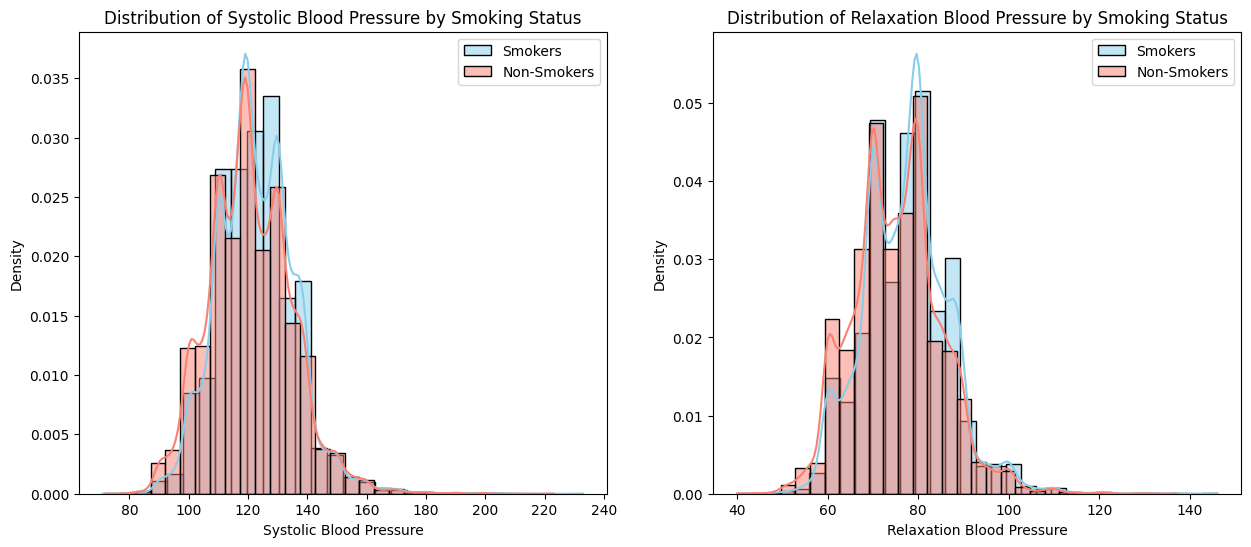

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

X_M = train_data.drop("smoking", axis=1)
y_M = train_data["smoking"]

data_M = X_M.copy()
data_M['smoking'] = y_M

fig, axs = plt.subplots(1, 2, figsize=(15, 6))

sns.histplot(data_M[data_M['smoking'] == 1]['systolic'], kde=True, color='skyblue', label='Smokers', stat='density', ax=axs[0], bins = 30)
sns.histplot(data_M[data_M['smoking'] == 0]['systolic'], kde=True, color='salmon', label='Non-Smokers', stat='density', ax=axs[0], bins = 30)
axs[0].set_title('Distribution of Systolic Blood Pressure by Smoking Status')
axs[0].set_xlabel('Systolic Blood Pressure')
axs[0].set_ylabel('Density')
axs[0].legend()

sns.histplot(data_M[data_M['smoking'] == 1]['relaxation'], kde=True, color='skyblue', label='Smokers', stat='density', ax=axs[1], bins = 30)
sns.histplot(data_M[data_M['smoking'] == 0]['relaxation'], kde=True, color='salmon', label='Non-Smokers', stat='density', ax=axs[1], bins = 30)
axs[1].set_title('Distribution of Relaxation Blood Pressure by Smoking Status')
axs[1].set_xlabel('Relaxation Blood Pressure')
axs[1].set_ylabel('Density')
axs[1].legend()

plt.show()

Предположением Марии было то, что курильщики часто имеют проблемы с давлением (как верхним, так и нижним). Как мы видим, курение оказывает разное влияние верхнее и нижнее давления, причем распределения не похожи на нормальные, поэтому сильной зависимости не наблюдается.

  Екатерина предположила, что статус курильщика может быть свяазан с уровнем сахара в крови человека. Мы видим, что у курящих людей распределение более неоднородное, хотя в целом распределения похожи.

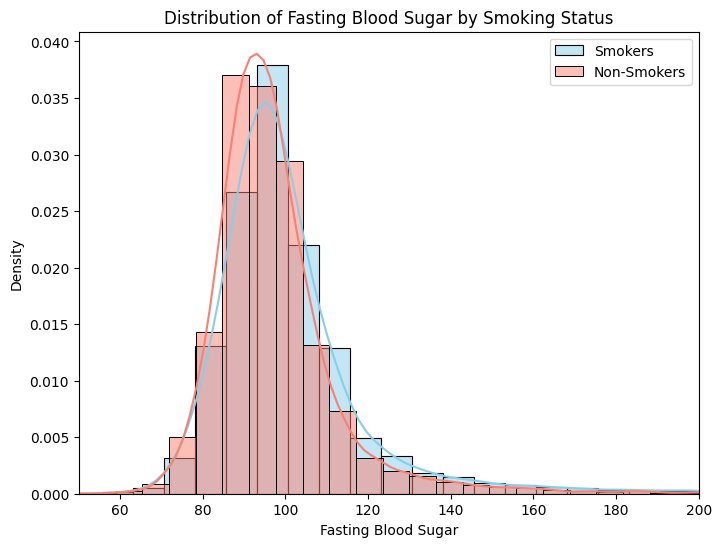

In [ ]:
fig, axs = plt.subplots(1, 1, figsize=(8, 6))

sns.histplot(data_M[data_M['smoking'] == 1]['fasting blood sugar'], kde=True, color='skyblue', label='Smokers', stat='density', ax=axs, bins = 50)
sns.histplot(data_M[data_M['smoking'] == 0]['fasting blood sugar'], kde=True, color='salmon', label='Non-Smokers', stat='density', ax=axs, bins = 50)
axs.set_title('Distribution of Fasting Blood Sugar by Smoking Status')
axs.set_xlabel('Fasting Blood Sugar')
axs.set_ylabel('Density')
plt.xlim(50,200)
axs.legend()
plt.show()


Дарья построила корреляционную матрицу и решила более подробно рассмотреть распределения Gtp, triglyceride и HDL, т.к. у них одна из высоких корреляций.


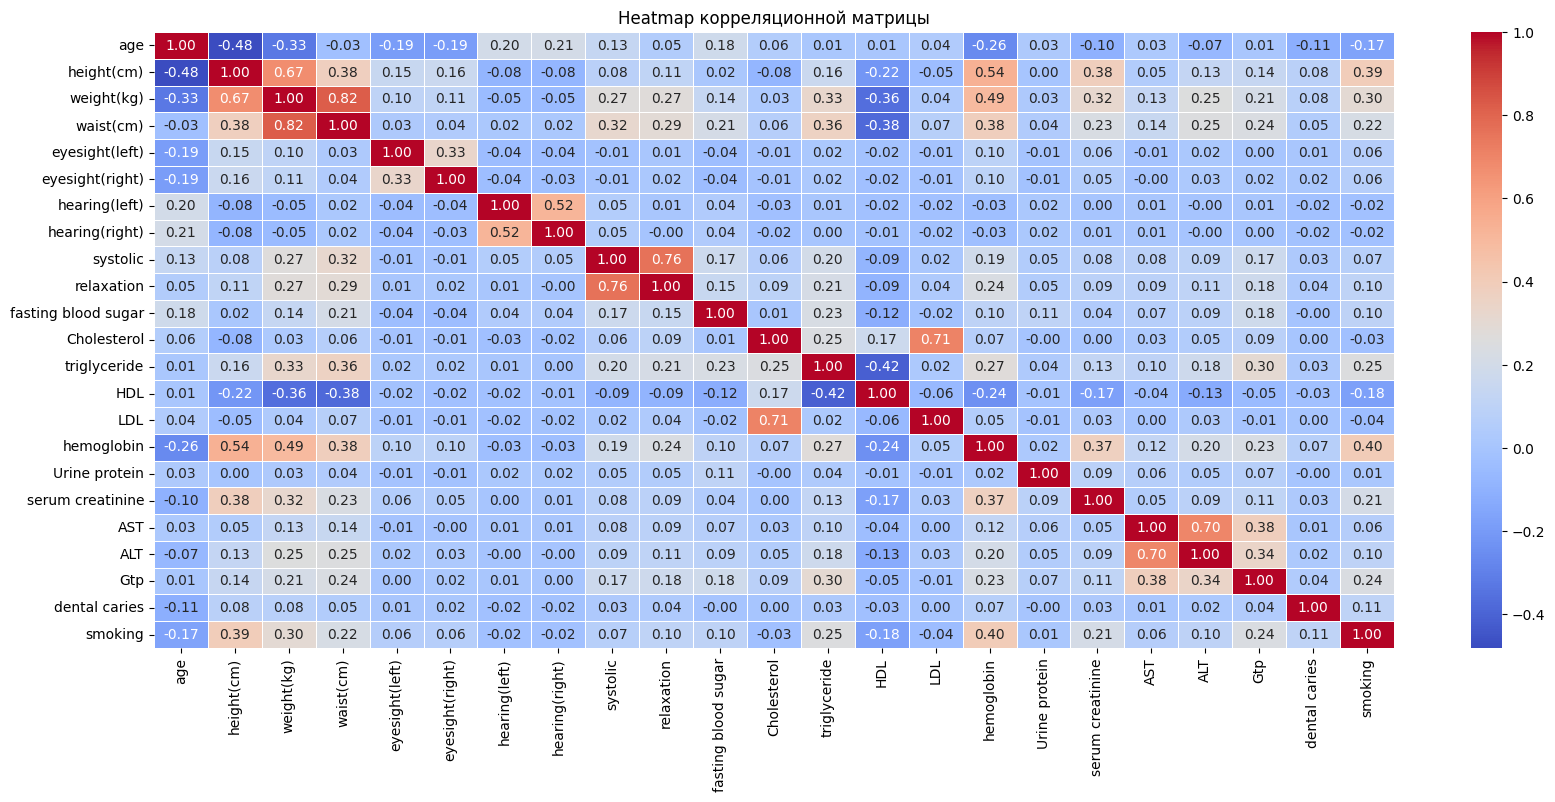

In [ ]:
#Анализ данных, чтобы понять зависимости
import seaborn as sns

corr = train_data.corr()
plt.figure(figsize=(20, 8))
sns.heatmap(data=corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap корреляционной матрицы')
plt.show()


Как мы видим выше, в той или иной степени все параметры друг от друга зависят, поэтому мы обязаны учитывать их все при реализации обучения наших методов.


Показатель Gtp (общий биохимический анализ крови): Мы видим, что у курящего человека вероятнее всего будет более высыкое значение Gtp, чем у некурящего (у некурящего чаще всего встречается низкий показатель Gtp). Результаты графика, сопостовимы с жизнью, т.к. уровень ГГТП является показателем того, что в печени, происходят нежелательные изменения.

Показатель triglyceride (триглецирид):аналогично анализу Gtp. Повышение триглицеридов свидетельствует о риске развитии болезни сердца.

Показатель HDL (ЛПВП: тип холестерина): у некурящего человека значение ЛПВП выше, чем у курящего, что логично, т.к. ЛПВП - это "хороший" холестерин, чем выше ЛПВП, тем меньше риск атеросклероза и сердечно-сосудистых заболеваний.

Курение является причиной/поводом отходящих от норм значений этих показателей, что и доказывает график.

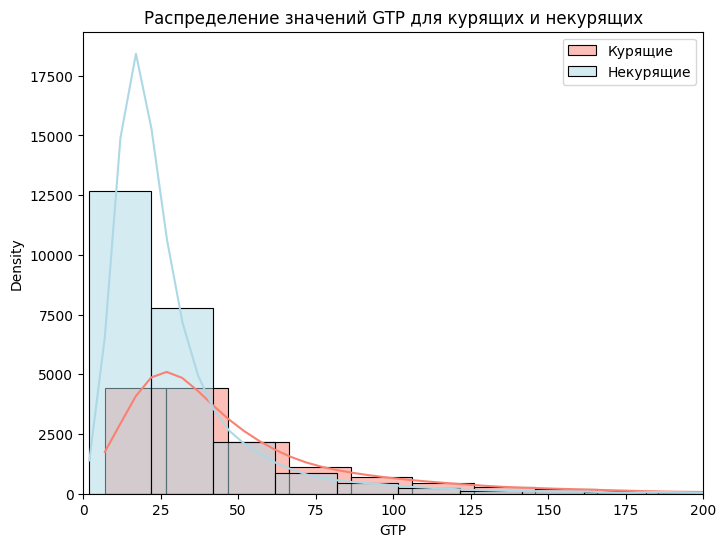

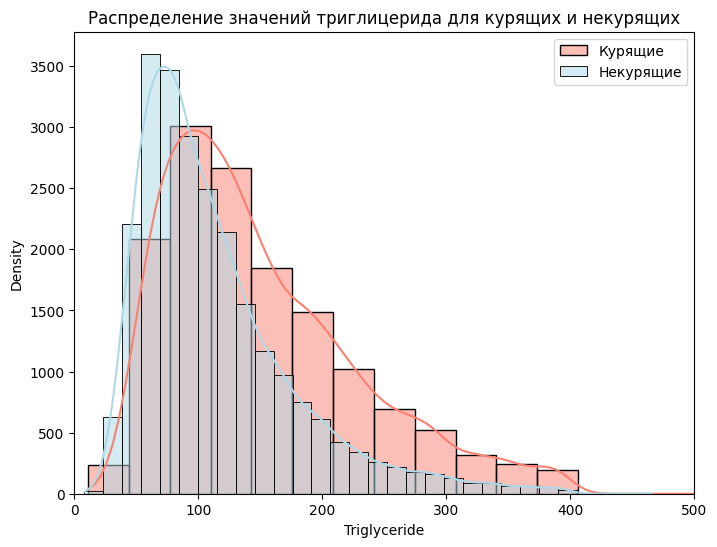

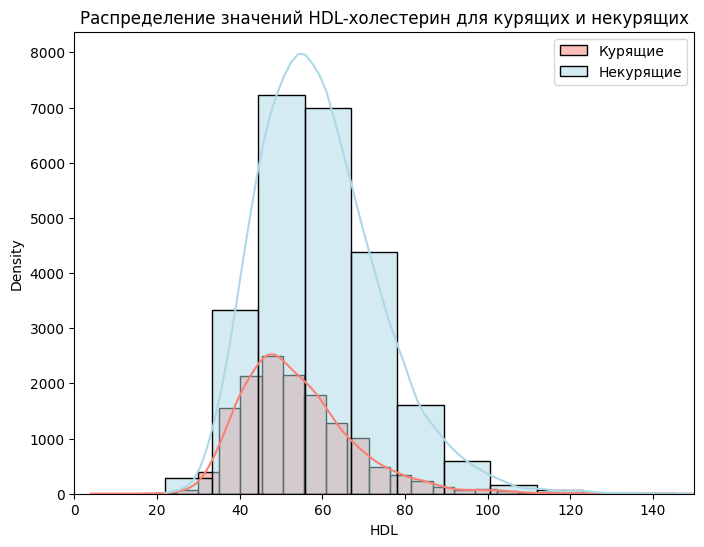

In [ ]:
# Рассмотрим распределение для курящих и некурящих GTP и triglyceride и HDL (тк у них одна из высоких корреляций)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.histplot(train_data[train_data['smoking'] == 1]['Gtp'], color='salmon', label='Курящие', kde=True, bins = 50)
sns.histplot(train_data[train_data['smoking'] == 0]['Gtp'], color='lightblue', label='Некурящие', kde=True, bins = 50)
plt.xlabel('GTP')
plt.ylabel('Density')
plt.xlim(0,200)
plt.title('Распределение значений GTP для курящих и некурящих')
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(train_data[train_data['smoking'] == 1]['triglyceride'], color='salmon', label='Курящие', kde=True, bins = 30)
sns.histplot(train_data[train_data['smoking'] == 0]['triglyceride'], color='lightblue', label='Некурящие', kde=True, bins = 30)
plt.xlabel('Triglyceride')
plt.ylabel('Density')
plt.xlim(0,500)
plt.title('Распределение значений триглицерида для курящих и некурящих')
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(train_data[train_data['smoking'] == 1]['HDL'], color='salmon', label='Курящие', kde=True, bins = 30)
sns.histplot(train_data[train_data['smoking'] == 0]['HDL'], color='lightblue', label='Некурящие', kde=True, bins = 30)
plt.xlabel('HDL')
plt.ylabel('Density')
plt.xlim(0,150)
plt.title('Распределение значений HDL-холестерин для курящих и некурящих')
plt.legend()
plt.show()

Александра также построила график зависимости уровня гемоглобина от курения. Наглядно видно, что зависимость похожа на нормальное распределение и что в среднем гемоглобин у курящих людей выше.

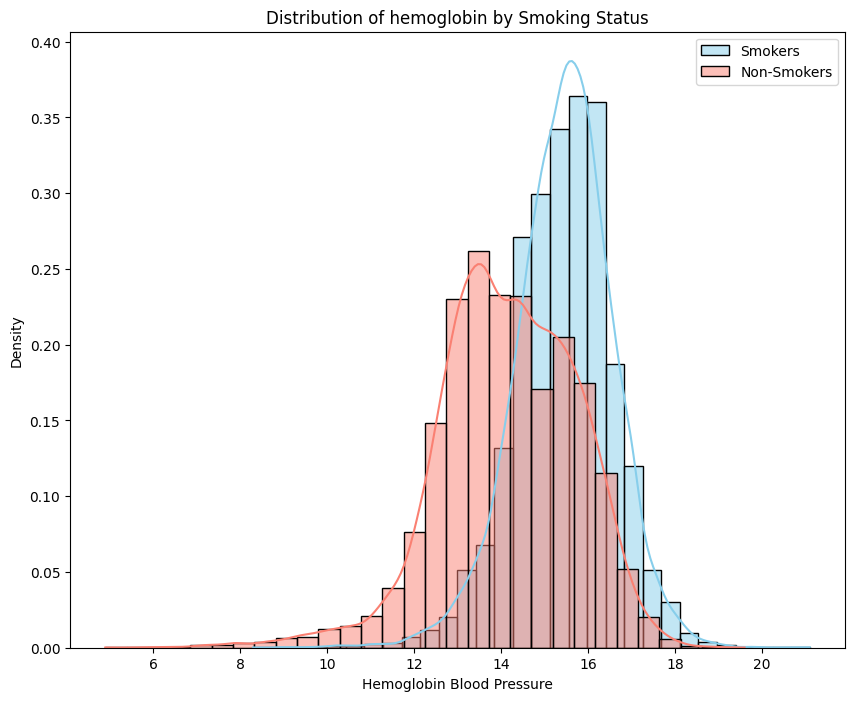

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

data_M = X_M.copy()
data_M['smoking'] = y_M

plt.figure(figsize=(10, 8))

sns.histplot(data_M[data_M['smoking'] == 1]['hemoglobin'], kde=True, color='skyblue', label='Smokers', stat='density', bins = 30)
sns.histplot(data_M[data_M['smoking'] == 0]['hemoglobin'], kde=True, color='salmon', label='Non-Smokers', stat='density', bins = 30)
plt.title('Distribution of hemoglobin by Smoking Status')
plt.xlabel('Hemoglobin Blood Pressure')
plt.ylabel('Density')
plt.legend()


plt.show()

##Логистическая регрессия

Первый метод - Логистической регрессии. Реализован и проанализирован Морозовой Марией.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score

train_M = pd.read_csv("/content/sample_data/train_dataset.csv")
test_M = pd.read_csv("/content/sample_data/test_dataset.csv")
train_M = train_M.drop_duplicates()
test_M = test_M.drop_duplicates()

X_M = train_M.drop("smoking", axis=1)
y_M = train_M["smoking"]

scaler = StandardScaler()
X_M_scaled = scaler.fit_transform(X_M)

X_train_M, X_test_M, y_train_M, y_test_M = train_test_split(X_M_scaled, y_M, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train_M, y_train_M)

y_pred_M = model.predict(X_test_M)

precision_M = precision_score(y_test_M, y_pred_M)
recall_M = recall_score(y_test_M, y_pred_M)
f1_M = f1_score(y_test_M, y_pred_M)
accuracy_M = model.score(X_test_M, y_test_M)
print(f"Accuracy: {accuracy_M:.3f}")
print(f"Precision: {precision_M:.3f}")
print(f"Recall: {recall_M:.3f}")
print(f"F1-score: {f1_M:.3f}")

coefficients = model.coef_[0]
feature_importance = pd.Series(coefficients, index=X_M.columns)
feature_importance = feature_importance.sort_values(ascending=False)
print("Feature importance:")
print(feature_importance[:10])

Accuracy: 0.711
Precision: 0.634
Recall: 0.544
F1-score: 0.586
Feature importance:
height(cm)             0.748691
hemoglobin             0.691525
Gtp                    0.479342
triglyceride           0.337685
dental caries          0.174418
waist(cm)              0.141617
fasting blood sugar    0.097375
relaxation             0.046924
serum creatinine       0.042256
eyesight(left)         0.026221
dtype: float64


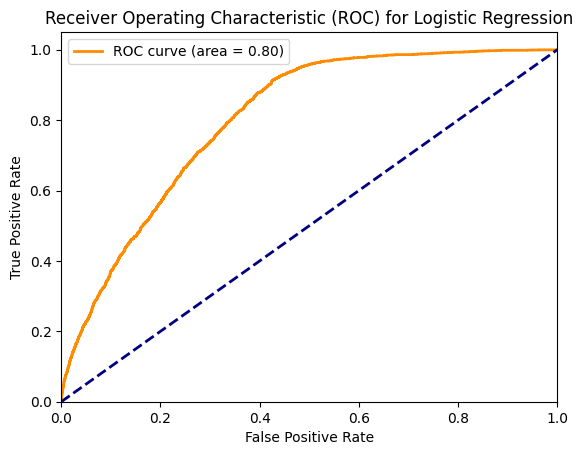

In [ ]:
from sklearn.metrics import roc_curve, auc

y_pred_prob = model.predict_proba(X_test_M)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test_M, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for Logistic Regression')
plt.legend(loc="best")
plt.show()

Здесь мы видим, что точность метода составляет 71%. Но наша задача выяснить, если какой-то другой метод будет точнее.

##KNN

Следующий метод - KNN. Реализован и проанализирован Микляевой Дарьей.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV


train_data_D = pd.read_csv('/content/sample_data/train_dataset.csv')
train_data_D = train_data_D.drop_duplicates()

y_D = train_data_D[train_data_D.columns[-1]].values
X_D = train_data_D[train_data_D.columns[:-1]].values

X_train_D, X_test_D, y_train_D, y_test_D = train_test_split(X_D,y_D, test_size=0.2, random_state=42)

params = {
    'n_neighbors': list(range(1, 11)),
    'metric': ['manhattan', 'euclidean'],
    'weights': ['uniform', 'distance']
}
clf = KNeighborsClassifier()
clf_grid = GridSearchCV(clf, params, cv=5, scoring='f1', n_jobs=-1)
clf_grid.fit(X_train_D, y_train_D)
print(clf_grid.best_params_)



{'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'distance'}


Precision: 0.602
Recall: 0.529
F1-score: 0.563


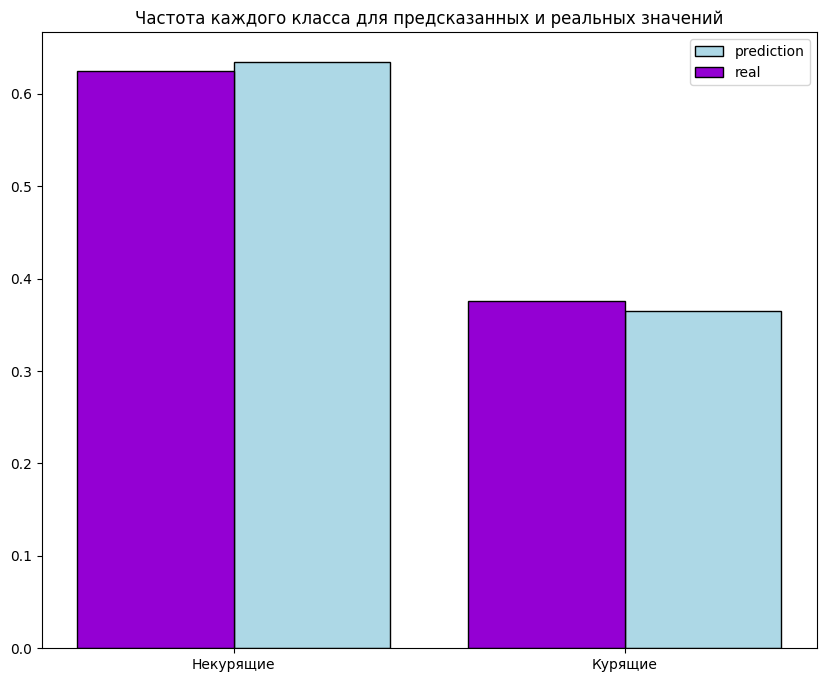

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
optimal_clf = KNeighborsClassifier(n_neighbors=clf_grid.best_params_['n_neighbors'],
                                   weights=clf_grid.best_params_['weights'],
                                   metric=clf_grid.best_params_['metric'])
optimal_clf.fit(X_train_D, y_train_D)
y_pred = optimal_clf.predict(X_test_D)

print(f"Precision: {precision_score(y_test_D, y_pred):.3f}")
print(f"Recall: {recall_score(y_test_D, y_pred):.3f}")
print(f"F1-score: {f1_score(y_test_D, y_pred):.3f}")

pred_prob = optimal_clf.predict_proba(X_test_D)
unique, freq = np.unique(y_test_D, return_counts=True)
freq = list(map(lambda x: x / len(y_test_D),freq))

pred_freq = pred_prob.mean(axis=0)
plt.figure(figsize=(10, 8))
plt.bar(range(0, 2), pred_freq, width=0.4, align="edge", label='prediction', color = 'lightblue',edgecolor='black')
plt.bar(range(0, 2), freq, width=-0.4, align="edge", label='real', color = 'darkviolet', edgecolor='black')
plt.xticks([0, 1], ['Некурящие', 'Курящие'])
plt.title('Частота каждого класса для предсказанных и реальных значений')
plt.legend()
plt.show()

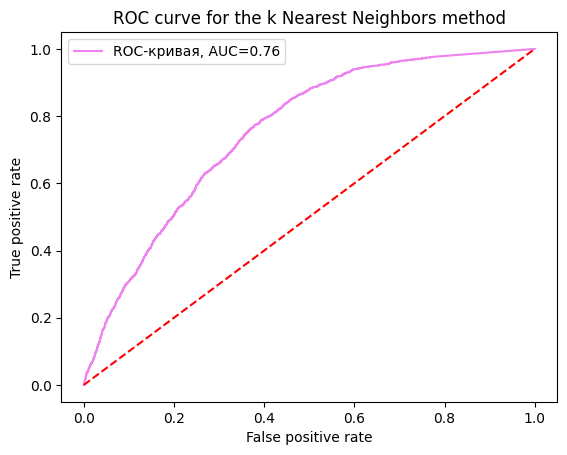

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

knn_pred_prob = optimal_clf.predict_proba(X_test_D)[:, 1]
false_prate, true_prate, _ = roc_curve(y_test_D, knn_pred_prob)
roc_auc = auc(false_prate, true_prate)

plt.figure()
plt.plot(false_prate, true_prate, color='violet', label=f'ROC-кривая, AUC={roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--') # ROC-кривая для случайного классификатора
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for the k Nearest Neighbors method')
plt.legend()
plt.show()

Мы видим, что здесь точность примерно 69%, что уже заметно меньше, чем у логистической регрессии.

## RandomForestClassifier

Третий метод - Случайного Леса. Реализован и проанализирован Караваевой Александрой.

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

train_data_copy_S = train_data.copy()

train_data_copy_S = train_data_copy_S.drop_duplicates()

x = train_data_copy_S.iloc[:,:22]
y = train_data_copy_S['smoking']

xtrains, xtests, ytrains, ytests = train_test_split(x,y, test_size=0.2, random_state=42)

Лучшие параметры: {'n_estimators': 300}
Лучший результат: 0.6507287206050306


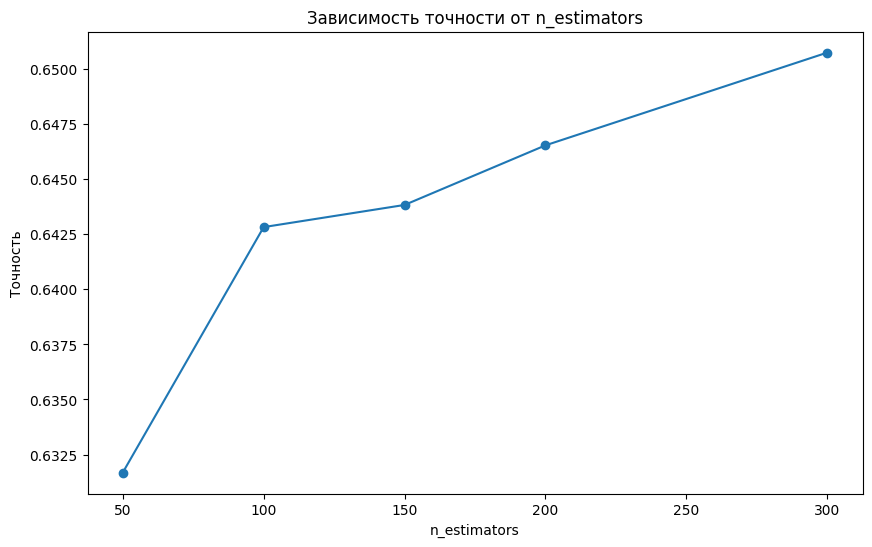

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt


# Создаем экземпляр RandomForestClassifier
rf_clf = RandomForestClassifier()

# Задаем значения n_estimators, которые хотим попробовать
param_grid = {
    'n_estimators': [50, 100, 150, 200, 300]  # Можешь изменить эти значения по своему усмотрению
}

# Создаем экземпляр GridSearchCV
grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=5,  scoring='f1')

# Обучаем модель с GridSearch для подбора лучших параметров
grid_search.fit(xtrains, ytrains)

# Выводим лучшие параметры и результаты
print("Лучшие параметры:", grid_search.best_params_)
print("Лучший результат:", grid_search.best_score_)

# Если нужно, можешь визуализировать результаты
results = grid_search.cv_results_
plt.figure(figsize=(10, 6))
plt.plot(param_grid['n_estimators'], results['mean_test_score'], marker='o')
plt.title("Зависимость точности от n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("Точность")
plt.show()

Наиболее важные признаки:
                Feature  Importance
15           hemoglobin    0.116511
20                  Gtp    0.097635
1            height(cm)    0.096855
12         triglyceride    0.067580
14                  LDL    0.051057
3             waist(cm)    0.049494
11          Cholesterol    0.049415
13                  HDL    0.049381
19                  ALT    0.048977
10  fasting blood sugar    0.048304
8              systolic    0.044749
18                  AST    0.043077
9            relaxation    0.042346
17     serum creatinine    0.041635
0                   age    0.040767
2            weight(kg)    0.040237
5       eyesight(right)    0.027726
4        eyesight(left)    0.027579
21        dental caries    0.008624
16        Urine protein    0.004589
7        hearing(right)    0.001759
6         hearing(left)    0.001702


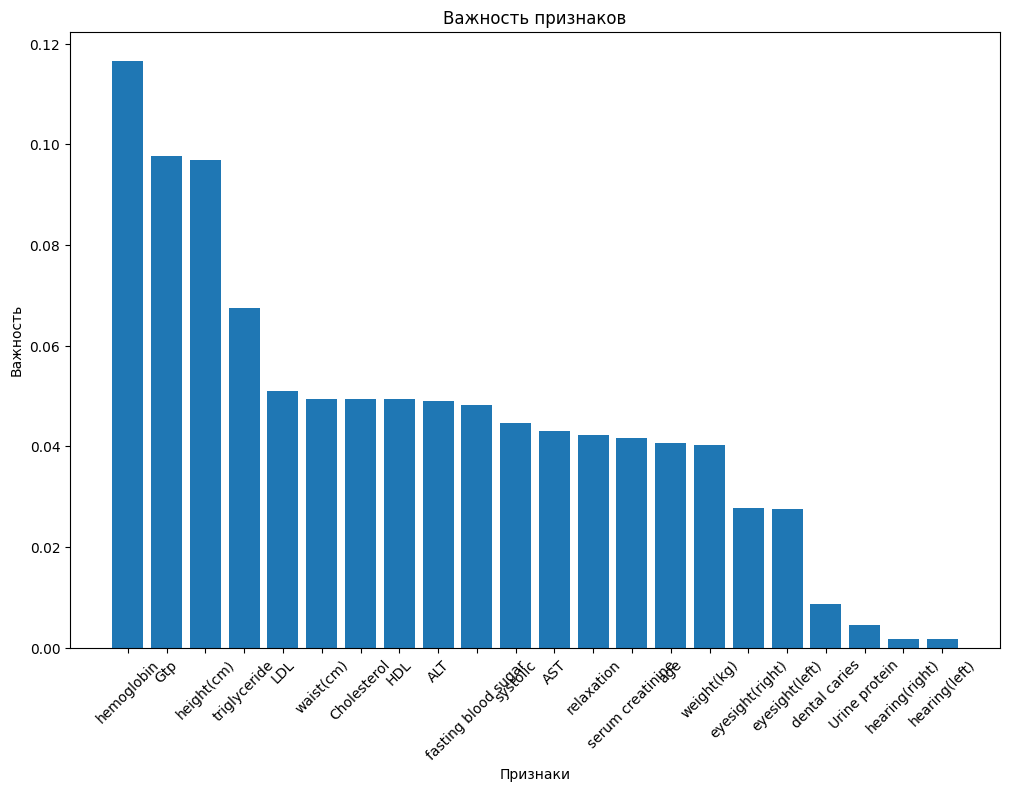

In [ ]:
# Обучаем модель с лучшим параметром n_estimators
best_rf_clf = RandomForestClassifier(n_estimators=300)
best_rf_clf.fit(xtrains, ytrains)

# Получаем важность признаков
feature_importances = best_rf_clf.feature_importances_

# Создаем DataFrame с важностью признаков
importances_df = pd.DataFrame({'Feature': xtrains.columns, 'Importance': feature_importances})
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Выводим наиболее важные признаки
print("Наиболее важные признаки:")
print(importances_df)

# Если нужно, можешь визуализировать важность признаков
plt.figure(figsize=(12, 8))
plt.bar(importances_df['Feature'], importances_df['Importance'])
plt.xticks(rotation=45)
plt.xlabel('Признаки')
plt.ylabel('Важность')
plt.title('Важность признаков')
plt.show()

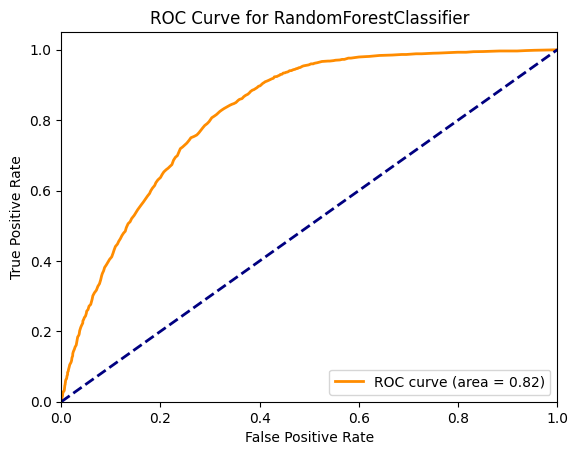

In [ ]:
from sklearn.metrics import roc_curve, auc

y_scores = best_rf_clf.predict_proba(xtests)[:, 1]
fpr, tpr, _ = roc_curve(ytests, y_scores)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for RandomForestClassifier')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

best_rf_clf = RandomForestClassifier(n_estimators=300)
best_rf_clf.fit(xtrains, ytrains)

y_pred = best_rf_clf.predict(xtests)
accuracy = accuracy_score(ytests, y_pred)
precision = precision_score(ytests, y_pred)
recall = recall_score(ytests, y_pred)
f1 = f1_score(ytests, y_pred)

print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-score: {f1:.3f}")

Precision: 0.663
Recall: 0.623
F1-score: 0.642


Мы видим, что точность данного метода составляет примерно 75%. Пока что это наилучший результат.

## CatBoostClassifier

Последний метод, который был проверен в проекте - CatBoost. Реализован и проанализирован Тарасюк Екатериной

In [ ]:
%%capture
!pip install catboost

In [ ]:
#территория кота
from sklearn.metrics import precision_score, recall_score, f1_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

data_cat = pd.read_csv('/content/sample_data/train_dataset.csv')
data_cat = data_cat.drop_duplicates()

x = data_cat.iloc[:,:22]
columns_drop = ['dental caries', 'AST', 'serum creatinine', 'Urine protein', 'fasting blood sugar', 'relaxation', 'systolic', 'hearing(right)', 'hearing(left)', 'eyesight(right)', 'eyesight(left)', 'weight(kg)', 'age']
x = x.drop(columns_drop, axis = 1)
y = data_cat['smoking']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

param_grid = {
    'iterations': [500, 1000, 1500],
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.1, 0.5]
}


model = CatBoostClassifier()

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='f1')
grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
print(best_params)

Выходные данные были обрезаны до нескольких последних строк (5000).
1001:	learn: 0.0203452	total: 16.5s	remaining: 8.2s
1002:	learn: 0.0203350	total: 16.5s	remaining: 8.18s
1003:	learn: 0.0202956	total: 16.5s	remaining: 8.16s
1004:	learn: 0.0202433	total: 16.5s	remaining: 8.15s
1005:	learn: 0.0201792	total: 16.6s	remaining: 8.13s
1006:	learn: 0.0201273	total: 16.6s	remaining: 8.11s
1007:	learn: 0.0200779	total: 16.6s	remaining: 8.1s
1008:	learn: 0.0200143	total: 16.6s	remaining: 8.08s
1009:	learn: 0.0199541	total: 16.6s	remaining: 8.06s
1010:	learn: 0.0199216	total: 16.6s	remaining: 8.04s
1011:	learn: 0.0198895	total: 16.6s	remaining: 8.03s
1012:	learn: 0.0198302	total: 16.7s	remaining: 8.01s
1013:	learn: 0.0198217	total: 16.7s	remaining: 7.99s
1014:	learn: 0.0198217	total: 16.7s	remaining: 7.97s
1015:	learn: 0.0198217	total: 16.7s	remaining: 7.95s
1016:	learn: 0.0198217	total: 16.7s	remaining: 7.93s
1017:	learn: 0.0198216	total: 16.7s	remaining: 7.91s
1018:	learn: 0.0198200	total: 16.

In [ ]:
%%capture
best_model = CatBoostClassifier(iterations=best_params['iterations'], depth=best_params['depth'], learning_rate=best_params['learning_rate'])
best_model.fit(x_train, y_train)

y_pred = best_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [ ]:
print("Точность на тестовом наборе данных: {:.2f}".format(accuracy))
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-score: {f1:.3f}")

Точность на тестовом наборе данных: 0.74
Precision: 0.654
Recall: 0.642
F1-score: 0.648


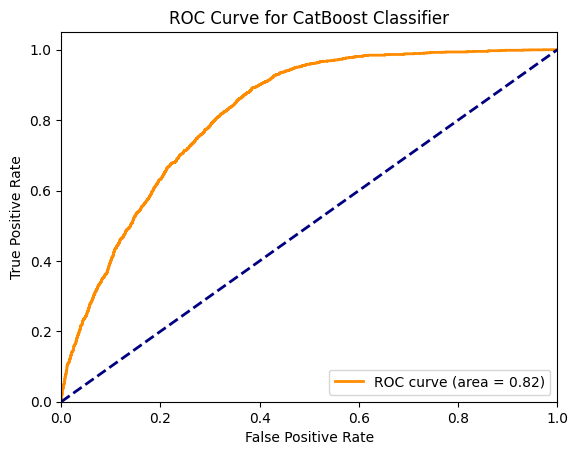

In [ ]:
y_scores = best_model.predict_proba(x_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for CatBoost Classifier')
plt.legend(loc="lower right")
plt.show()

Сделаем глобальный вывод. Оценим эффективность каждой из моделей по значениям Precision, Recall и F1-score.
1. **Precision (точность)**:
   - Показывает, как часто модель правильно предсказывает положительный класс. В нашем случае, как часто модель говорит, что курильщик на самом деле курильщик.
   - Чем выше Precision, тем меньше ложноположительных результатов у модели.

2. **Recall (полнота)**:
   - Показывает, как много реальных положительных случаев модель предсказала правильно. В нашем случае, не назвала ли модель некурящим курящего (не пропустила ли она критическое число курильщиков).
   - Чем выше Recall, тем меньше пропущенных положительных случаев модель.

3. **F1-score**:
   - Сводит воедино Precision и Recall в единую метрику, является сбалансированной метрикой, учитывающей и точность, и полноту.
  
Оценим наши модели следующим образом:
- Высокое значение Precision говорит о низком уровне ложноположительных результатов.
- Высокое значение Recall показывает, что модель корректно предсказывает много положительных случаев.
- Высокий F1-score указывает на хорошее сбалансированное качество модели. \\
 В нашем случае наивысшие показатели у модели RandomForestClassifier, поэтому для данного исследования лучше использовать его.
  